<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_6/les_6_lector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat, savemat

sns.set_context('notebook')
sns.set_style('white')

In [2]:
# Create sample data
data = {
    '__header__': b'MATLAB 5.0 MAT-file, Generated by ChatGPT',
    '__version__': '1.0',
    '__globals__': [],
    'X': np.random.rand(100, 2),  # Example 100x2 matrix
    'Xval': np.random.rand(50, 2),  # Example 50x2 matrix
    'yval': np.random.randint(0, 2, size=(50, 1))  # Example 50x1 binary labels
}

data1 = data

In [5]:
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [6]:
X1 = data1['X']
Xval1 = data1['Xval']
yval1 = data1['yval']

print('X1: ', X1.shape)
print('Xval1: ', Xval1.shape)
print('yval1: ', yval1.shape)

X1:  (100, 2)
Xval1:  (50, 2)
yval1:  (50, 1)


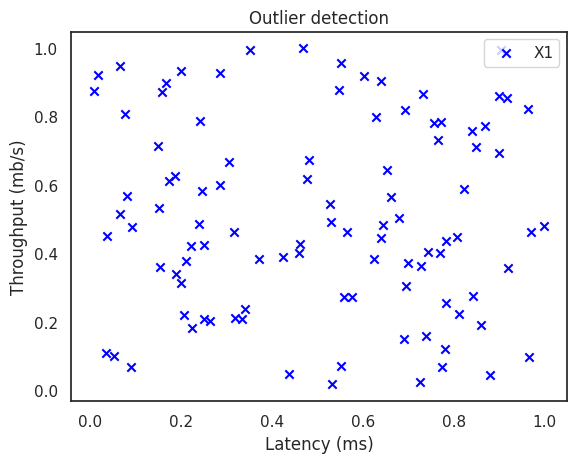

In [7]:
plt.scatter(X1[:, 0], X1[:, 1], c='b', marker='x', label='X1')
plt.title('Outlier detection')
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.legend()
plt.show()

In [8]:
from sklearn.covariance import EllipticEnvelope

clf = EllipticEnvelope(random_state=0)
clf.fit(X1)

EllipticEnvelope(random_state=0)

<ipython-input-31-873b39a02a58>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, rug=True, ax=ax1)
<ipython-input-31-873b39a02a58>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred[outliers], rug=True, ax=ax1, color='r', norm_hist=True, hist=False, kde=False)


Text(0, 0.5, 'Throughput (mb/s)')

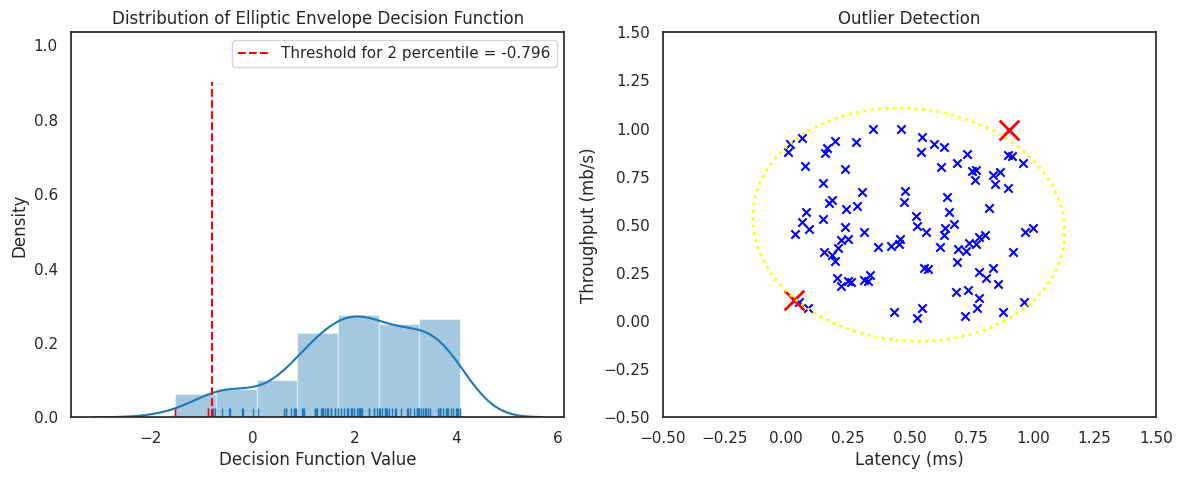

In [31]:
# create the grid for plotting
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200), np.linspace(-0.5, 1.5, 200))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Calculate the decision function and use threshold to determine outliers
y_pred = clf.decision_function(X1).ravel()
percentile = 2
threshold = np.percentile(y_pred, percentile)
outliers = y_pred < threshold

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# left plot
# Plot the decision function value
sns.distplot(y_pred, rug=True, ax=ax1)
# Plot the decision function outliers in red
sns.distplot(y_pred[outliers], rug=True, ax=ax1, color='r', norm_hist=True, hist=False, kde=False)
ax1.vlines(threshold, 0, 0.9, linestyles='dashed', colors='r',
           label='Threshold for {} percentile = {}'.format(percentile, np.round(threshold, 3)))
ax1.set_title('Distribution of Elliptic Envelope Decision Function')
ax1.set_xlabel('Decision Function Value')
ax1.set_ylabel('Density')
ax1.legend(loc='best')

# right plot
# Plot the observation
ax2.scatter(X1[:, 0], X1[:, 1], c='b', marker='x')
# Plot outliers
ax2.scatter(X1[outliers, 0], X1[outliers, 1], c='r', marker='x', linewidths=2, s=200)
# Plot decision boundary based threshold
ax2.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='yellow', linestyles='dotted')
ax2.set_title('Outlier Detection')
ax2.set_xlabel('Latency (ms)')
ax2.set_ylabel('Throughput (mb/s)')